# Automatas Celulares:

**Eduardo Carrasco Vidal**

## Creación de un Elementary Celular Automata (Bidimensional):

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import random

def init(size):
    return np.random.randint(0, 2, (size, size))

In [111]:
def apply_rule(cell, neighborhood_sum, rule_number):
    rule = f"{rule_number:08b}"
    index = 7 - neighborhood_sum
    return int(rule[index]) if cell else cell

In [112]:
def get_neighborhood(state, x, y, neighborhood_type):
    if neighborhood_type == 'Moore':
        return state[max(0, x-1):x+2, max(0, y-1):y+2].flatten()
    elif neighborhood_type == 'Neumann':
        return np.array([
            state[x, y], 
            state[x, max(0, y-1)], 
            state[x, min(y+1, state.shape[1]-1)], 
            state[max(0, x-1), y], 
            state[min(x+1, state.shape[0]-1), y]
        ])

In [113]:
def evolve(initial_state, rule_number, generations, neighborhood_type='moore'):
    state = initial_state.copy()
    history = [state]
    
    for _ in range(generations):
        new_state = state.copy()
        for x in range(state.shape[0]):
            for y in range(state.shape[1]):
                neighborhood = get_neighborhood(state, x, y, neighborhood_type)
                cell = state[x, y]
                neighborhood_sum = np.sum(neighborhood) - cell
                new_state[x, y] = apply_rule(cell, neighborhood_sum, rule_number)
        state = new_state
        history.append(state)
    
    return history

In [114]:
def print_automata(automata_bi, generation):
    plt.imshow(automata_bi, cmap='Greys', interpolation='nearest')
    print(f"  Tipo de Vecindario: {neighborhood_type}")
    plt.title(f"N° Generación {generation}")
    plt.show()

  Tipo de Vecindario: Neumann


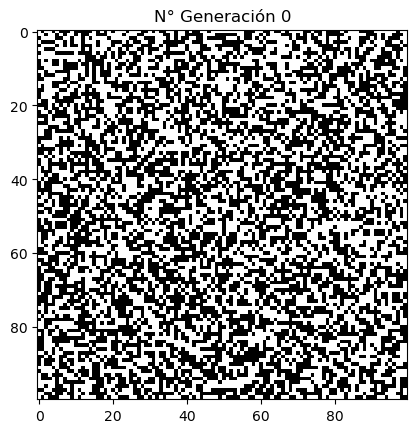

  Tipo de Vecindario: Neumann


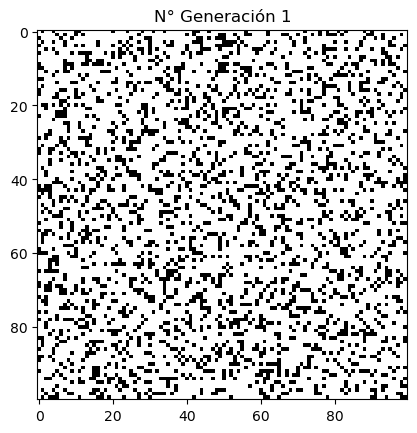

In [115]:
size = 100
rule_number = 10
generations = 1
neighborhood_type = 'Neumann'

initial_state = init(size)
history = evolve(initial_state, rule_number, generations, neighborhood_type)

for i, automata_bi in enumerate(history):
    print_automata(automata_bi, i)